## Sample analysis

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.io.wavfile
import matplotlib.pyplot as plt

from eggd800.signal import butter_lowpass_filter
from audiolabel import read_label
from phonlab.utils import dir2df, match_tokentimes

In [2]:
datadir = Path(
    '/Users/ronald/Library/CloudStorage/Box-Box/amazon_nasality_grant/data_analysis/Jorge_analysis'
)
wavdir = Path(
    '/Users/ronald/Library/CloudStorage/Box-Box/cla/projects/digital_queues/external_depositors/amazonian_nasality_data_uploads/006_jorge_emilio_roses_labrada'
)

Get dataframes of textgrids and .wav files to analyze. I'm working with a single made up textgrid. Extract experiment variables from the filenames.

In [3]:
tgdf = dir2df(
    datadir,
    fnpat='(?P<lang>[^_]+)_(?P<spkr>[^_]+)_(?P<researcher>[^_]+)_(?P<tstamp>[^_]+)_(?P<item>.+)_(?P<rep>\d+)\.TextGrid',
    addcols=['barename']
)
tgdf

,relpath,fname,barename,lang,spkr,researcher,tstamp,item,rep
0,ros,pid_ros_jrl_20220512T110242__removeraguaM__0.T...,pid_ros_jrl_20220512T110242__removeraguaM__0,pid,ros,jrl,20220512T110242,_removeraguaM_,0
1,ros,pid_ros_jrl_20220512T110301__removeraguaF__0.T...,pid_ros_jrl_20220512T110301__removeraguaF__0,pid,ros,jrl,20220512T110301,_removeraguaF_,0
2,ros,pid_ros_jrl_20220512T110332__quebrarM__0.TextGrid,pid_ros_jrl_20220512T110332__quebrarM__0,pid,ros,jrl,20220512T110332,_quebrarM_,0
3,ros,pid_ros_jrl_20220512T110354__quebrarF__0.TextGrid,pid_ros_jrl_20220512T110354__quebrarF__0,pid,ros,jrl,20220512T110354,_quebrarF_,0
4,ros,pid_ros_jrl_20220512T110420__covarM__0.TextGrid,pid_ros_jrl_20220512T110420__covarM__0,pid,ros,jrl,20220512T110420,_covarM_,0
...,...,...,...,...,...,...,...,...,...
91,ros,pid_ros_jrl_20220512T114937__alumbrarM__0.Text...,pid_ros_jrl_20220512T114937__alumbrarM__0,pid,ros,jrl,20220512T114937,_alumbrarM_,0
92,ros,pid_ros_jrl_20220512T114958__alumbrarF__0.Text...,pid_ros_jrl_20220512T114958__alumbrarF__0,pid,ros,jrl,20220512T114958,_alumbrarF_,0
93,ros,pid_ros_jrl_20220518T145005__bannarseM__0.Text...,pid_ros_jrl_20220518T145005__bannarseM__0,pid,ros,jrl,20220518T145005,_bannarseM_,0
94,ros,pid_ros_jrl_20220518T145100__bannarseM__1.Text...,pid_ros_jrl_20220518T145100__bannarseM__1,pid,ros,jrl,20220518T145100,_bannarseM_,1


In [4]:
wavdf = dir2df(
    wavdir,
    fnpat='(?P<lang>[^_]+)_(?P<spkr>[^_]+)_(?P<researcher>[^_]+)_(?P<tstamp>[^_]+)_(?P<item>.+)_(?P<rep>\d+)\.wav',
    addcols=['barename']
)
wavdf

,relpath,fname,barename,lang,spkr,researcher,tstamp,item,rep
0,pid/aop/20220512,pid_aop_jrl_20220512T090321__zero__0.wav,pid_aop_jrl_20220512T090321__zero__0,pid,aop,jrl,20220512T090321,_zero_,0
1,pid/aop/20220512,pid_aop_jrl_20220512T090455__beberM__0.wav,pid_aop_jrl_20220512T090455__beberM__0,pid,aop,jrl,20220512T090455,_beberM_,0
2,pid/aop/20220512,pid_aop_jrl_20220512T090519__beberF__0.wav,pid_aop_jrl_20220512T090519__beberF__0,pid,aop,jrl,20220512T090519,_beberF_,0
3,pid/aop/20220512,pid_aop_jrl_20220512T090546__entrarM__0.wav,pid_aop_jrl_20220512T090546__entrarM__0,pid,aop,jrl,20220512T090546,_entrarM_,0
4,pid/aop/20220512,pid_aop_jrl_20220512T090703__entrarM__1.wav,pid_aop_jrl_20220512T090703__entrarM__1,pid,aop,jrl,20220512T090703,_entrarM_,1
...,...,...,...,...,...,...,...,...,...
995,pid/ros/20220518,pid_ros_jrl_20220518T144941__zero__1.wav,pid_ros_jrl_20220518T144941__zero__1,pid,ros,jrl,20220518T144941,_zero_,1
996,pid/ros/20220518,pid_ros_jrl_20220518T145005__bannarseM__0.wav,pid_ros_jrl_20220518T145005__bannarseM__0,pid,ros,jrl,20220518T145005,_bannarseM_,0
997,pid/ros/20220518,pid_ros_jrl_20220518T145100__bannarseM__1.wav,pid_ros_jrl_20220518T145100__bannarseM__1,pid,ros,jrl,20220518T145100,_bannarseM_,1
998,pid/ros/20220518,pid_ros_jrl_20220518T145120__bannarseF__0.wav,pid_ros_jrl_20220518T145120__bannarseF__0,pid,ros,jrl,20220518T145120,_bannarseF_,0


In [5]:
def get_sigs(wavfile, chan=['audio', 'orfl', None, 'nsfl'], cutoff=50, order=3):
    '''
    Get signals from `wavfile`.
    
    Parameters
    ----------
    
    wavfile : Path or str
    The .wav file to read.
    
    chan : list of str
    A list of signal channels in the order that they occur in the wavfile. Use
    None as a placeholder for a channel from wavfile that will not be returned.
    Channels named 'orfl' and 'nsfl' will be filtered.
    
    cutoff : num or None
    Cutoff value of the lowpass butterworth filter for 'orfl' and 'nsfl' signals.
    If None, do not lowpass filter flow signals.
    
    order : int
    Order of the lowpass butterworth filter for 'orfl' and 'nsfl' signals.
    
    Returns
    -------
    Tuple consisting of:
    
    rate : num
    Data sample rate.
    
    ts : array
    Times corresponding to each sample value.
    
    arrays : array
    An array for each non-None value passed as `chan`. With the default value of
    `chan` three arrays are returned, for a total of five elements in the returned
    tuple.
    '''
    chanmap = {c: idx for idx, c in enumerate(chan) if c is not None}
    (rate, data) = scipy.io.wavfile.read(wavfile)
    ts = np.arange(data.shape[0]) / rate
    if cutoff is not None:
        data[:, chanmap['orfl']] = butter_lowpass_filter(
            data[:, chanmap['orfl']], cutoff, rate, order
        )
        data[:, chanmap['nsfl']] = butter_lowpass_filter(
            data[:, chanmap['nsfl']], cutoff, rate, order
        )
    return (rate, ts, *[data[:, c] for c in chanmap.values()])

In [6]:
for row in tgdf.itertuples():
    pass
    # There is only one textgrid in the sample I'm working with, so let's
    # move on and illustrate what can be done in this loop by working
    # with the current value of `row`. See next cell(s).

Load the tier(s) from the textgrid as dataframe(s), then select tokens from the dataframe. Calculate token durations and add to dataframe. Add `item` and `spkr` metadata from `row`.

In [7]:
# Set of consonant symbols.
consonants = ['kʷ', 't͡ʃ', 'ʔ', 'h']
vowels = ['æ', 'i', 'u']

[wddf, phdf, notesdf] = read_label(str(datadir / row.relpath / row.fname), ftype='praat')
phdf['dur'] = phdf['t2'] - phdf['t1']
tokens = phdf[phdf['label'].isin(consonants)].copy()
tokens['item'] = row.item
tokens['spkr'] = row.spkr
tokens = tokens.sort_values(['label', 't1'])
tokens

,t1,t2,label,fname,dur,item,spkr
7,3.703209,3.734068,h,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.030859,_bannarseF_,ros
18,5.178418,5.206251,h,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.027833,_bannarseF_,ros
29,6.598553,6.626386,h,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.027833,_bannarseF_,ros
40,7.963991,8.009976,h,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.045986,_bannarseF_,ros
51,9.288386,9.326506,h,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.038120,_bannarseF_,ros
5,3.542864,3.662064,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.119200,_bannarseF_,ros
16,5.008391,5.141508,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.133117,_bannarseF_,ros
27,6.432157,6.565273,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.133117,_bannarseF_,ros
38,7.820588,7.925266,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.104678,_bannarseF_,ros
49,9.135302,9.249661,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.114359,_bannarseF_,ros


Load the signals. Oral flow and nasal flow are lowpass filtered.

In [8]:
(rate, ts, audio, orfl, nsfl) = get_sigs(
    str(wavdir / row.lang / row.spkr / row.tstamp[:8] / f'{row.barename}.wav'),
    cutoff=50
)

For each selected token, read the corresponding data from the nasal flow channel and assemble into a list of arrays. Note that `sigs` has exactly one element (an array) for every row in `tokens`. This means that you can use integer-based location indexing to match signals and tokens.

In [9]:
sigs = []
for tok in tokens.itertuples():
    rng = np.arange(match_tokentimes(tok.t1, ts), match_tokentimes(tok.t2, ts))
    sigs.append(nsfl[rng])
len(sigs) == len(tokens)    # Same number of elements and rows.

True

The `tokens` dataframe also has a **label** index that also happens to be consist of integers, and you should not confuse them. Select with `iloc` for location indexing, and `loc` uses labels.

In [10]:
print(tokens.iloc[1])   # integer location index (2nd row)
print(tokens.loc[1])    # integer label index

t1                                                5.178418
t2                                                5.206251
label                                                    h
fname    /Users/ronald/Library/CloudStorage/Box-Box/ama...
dur                                               0.027833
item                                           _bannarseF_
spkr                                                   ros
Name: 18, dtype: object
t1                                                 3.26695
t2                                                3.340164
label                                                  t͡ʃ
fname    /Users/ronald/Library/CloudStorage/Box-Box/ama...
dur                                               0.073214
item                                           _bannarseF_
spkr                                                   ros
Name: 1, dtype: object


## Simple plotting

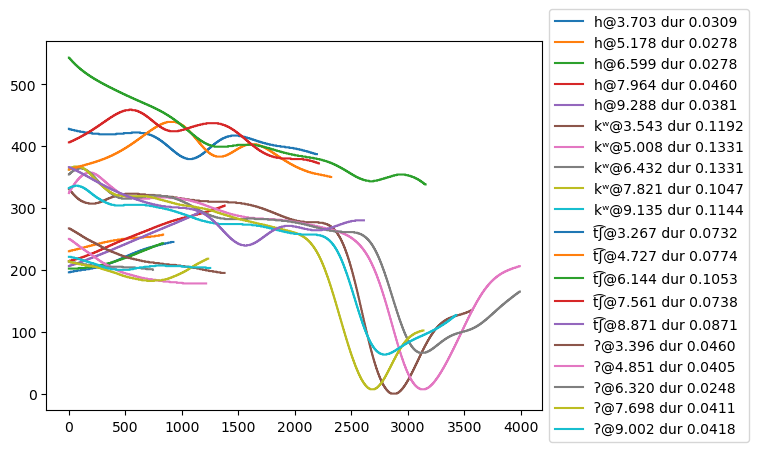

In [11]:
handles = []
ax = plt.subplot(111)
for tok, sig in zip(tokens.itertuples(), sigs):
    handles.append(
        ax.plot(
            sig,
            label=f'{tok.label}@{tok.t1:.3f} dur {tok.dur:.4f}'
        )[0]
    )
ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5));

### Data exploration

Now that you've got your tokens and signals you might want to pull a subset based on some criteria and look more closely at a few of them. In the preceding plot you can see that some of the signals are longer than the others. You can create an integer location index of the signals with length greater than a threshold number of samples you choose.

In [12]:
threshold = 3000
longidx = np.nonzero([len(s) >= threshold for s in sigs])[0]
longidx

array([ 5,  6,  7,  8,  9, 12])

You can use this index to select signals and tokens rows.

In [13]:
tokens.iloc[longidx]

,t1,t2,label,fname,dur,item,spkr
5,3.542864,3.662064,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.119200,_bannarseF_,ros
16,5.008391,5.141508,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.133117,_bannarseF_,ros
27,6.432157,6.565273,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.133117,_bannarseF_,ros
38,7.820588,7.925266,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.104678,_bannarseF_,ros
49,9.135302,9.249661,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.114359,_bannarseF_,ros
23,6.143536,6.248819,t͡ʃ,/Users/ronald/Library/CloudStorage/Box-Box/ama...,0.105283,_bannarseF_,ros


In [14]:
[sigs[i] for i in longidx]

[array([331, 331, 330, ..., 135, 135, 136], dtype=int16),
 array([324, 325, 325, ..., 206, 206, 206], dtype=int16),
 array([354, 354, 354, ..., 165, 165, 165], dtype=int16),
 array([362, 363, 363, ..., 102, 102, 102], dtype=int16),
 array([332, 332, 332, ..., 127, 127, 127], dtype=int16),
 array([543, 543, 543, ..., 338, 338, 338], dtype=int16)]

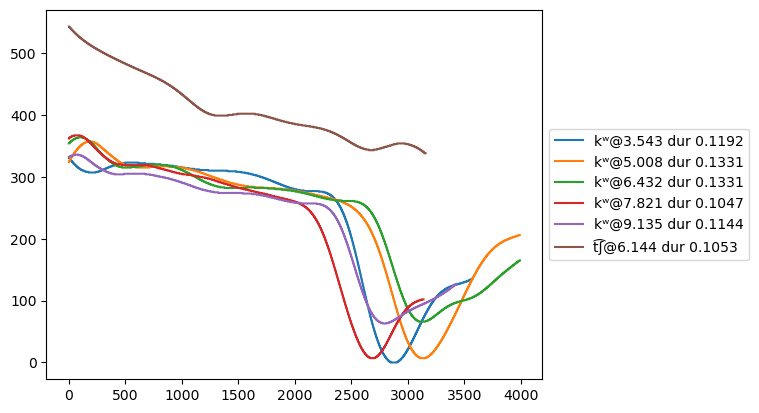

In [15]:
handles = []
ax = plt.subplot(111)
for tok, sig in zip(tokens.iloc[longidx].itertuples(), [sigs[i] for i in longidx]):
    handles.append(
        ax.plot(
            sig,
            label=f'{tok.label}@{tok.t1:.3f} dur {tok.dur:.4f}'
        )[0]
    )
ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5));

The preceding example shows selecting based on the length of the signal arrays. A similar technique selects rows from `tokens` by their duration value. Here we find the integer indexes where 

In [16]:
durthresh = 0.080
longidx = np.flatnonzero(tokens['dur'] >= durthresh)
longidx

array([ 5,  6,  7,  8,  9, 12, 14])

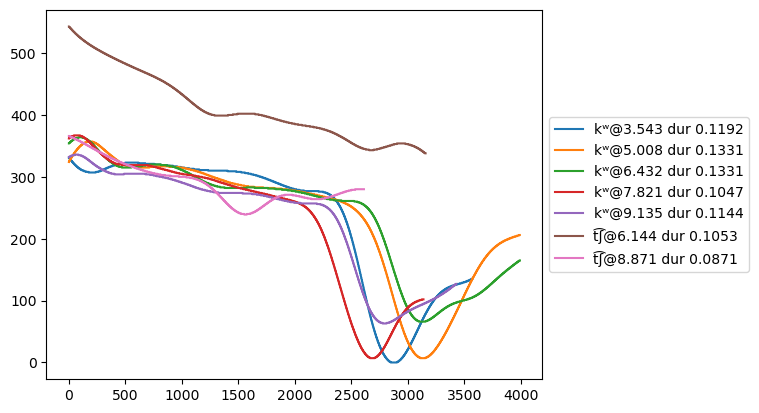

In [17]:
handles = []
ax = plt.subplot(111)
for tok, sig in zip(tokens.iloc[longidx].itertuples(), [sigs[i] for i in longidx]):
    handles.append(
        ax.plot(
            sig,
            label=f'{tok.label}@{tok.t1:.3f} dur {tok.dur:.4f}'
        )[0]
    )
ax.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5));